# Predicting Loan Payback

This project focuses on building a machine learning model to predict whether a borrower will repay their loan on time based on various features such as credit score, income, loan amount, and employment status. 

## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

# Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
# loading from zipped file downloaded from kaggle
# path= r"C:\Users\owolabi michael\Downloads\Compressed\playground-series-s5e11.zip"
path= r"C:\Users\OLASQUARE\Downloads\Compressed\playground-series-s5e11_2.zip"
# viewing contents of the zip file
with ZipFile(path, 'r') as zip_ref:
    zip_ref.printdir()


File Name                                             Modified             Size
sample_submission.csv                          2025-10-28 23:08:48      2291139
test.csv                                       2025-10-28 23:08:48     23021430
train.csv                                      2025-10-28 23:08:50     55988519


In [3]:
# loading the dataset
with ZipFile(path, 'r') as zip_ref:
    # loading the train data
    with zip_ref.open("train.csv") as tr:
        train_df= pd.read_csv(tr)

    # loading the test data
    with zip_ref.open("test.csv") as te:
        test_raw= pd.read_csv(te)

In [4]:
#   making the copy of the data
train_data=train_df.copy()
test_data=test_raw.copy()
train_data.head(5)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
test_data.head(5)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


## Exploratory Data Analysis (EDA)

### Data Descriptions

In [6]:
# shapes of the datasets
print("Train data Shape: ",train_data.shape)
print("Test data Shape",test_data.shape)


Train data Shape:  (593994, 13)
Test data Shape (254569, 12)


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442236,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


## checking missing values

In [9]:
train_data.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

### checking duplicates

In [10]:
train_data.duplicated().sum()

np.int64(0)

In [11]:
#  let drop the id column
train_data=train_data.drop(columns='id')
test_data=test_data.drop(columns='id')
#  let select numerica columns
num_col= train_data.select_dtypes(include='number').columns.drop('loan_paid_back')
num_col

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate'],
      dtype='object')

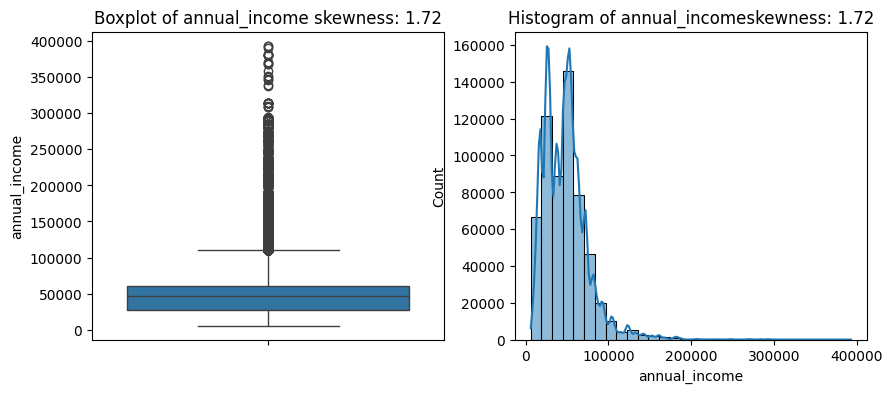

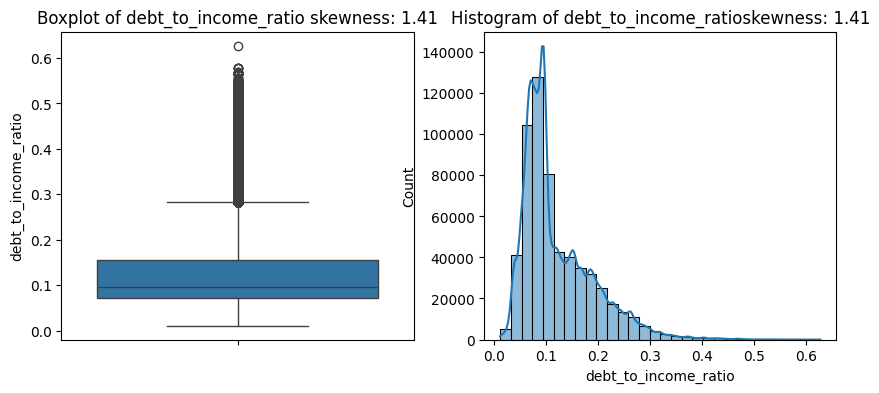

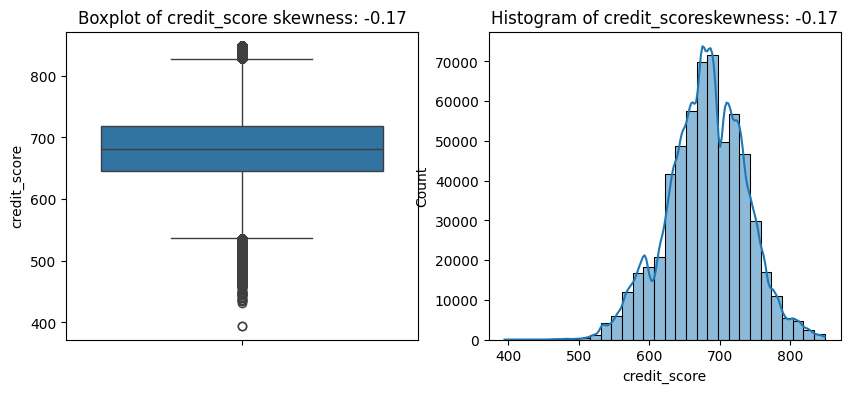

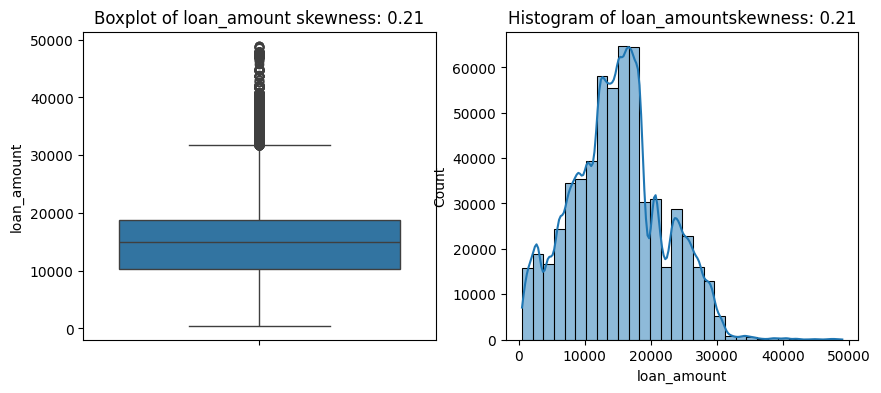

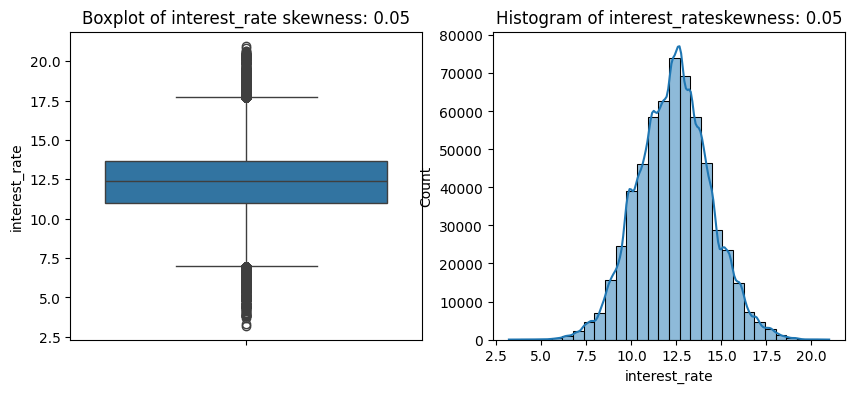

In [12]:
# let check for the presence of outliers and skewness
def outliers_skew_check(df, columns):
    df=df.copy()
    for col in columns:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.boxplot(df[col])
        plt.title(f'Boxplot of {col} skewness: {df[col].skew():.2f}')
        plt.subplot(1,2,2)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}skewness: {df[col].skew():.2f}')
    plt.tight_layout
    plt.show()
# calling the function
outliers_skew_check(train_data, num_col)

In [13]:
# let select categorical column
cat_col= train_data.select_dtypes(include='object')

In [14]:
# checking values count for catgeorical data
for col in cat_col:
    print(f"Distribution of {col}:\n {train_data[col].value_counts()}")
    print("==========================\n")

Distribution of gender:
 gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

Distribution of marital_status:
 marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64

Distribution of education_level:
 education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

Distribution of employment_status:
 employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

Distribution of loan_purpose:
 loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64

Distribution of grade_subgrade:
 grade_subgrade


From the EDA, there are right skewed and left skew observed.. Power transformation is recommender